# Python exploratory data analysis pipeline 探索性数据分析

----------


Please visit office site [kaggle house price](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) for more project background. 房价预测模型

This notebook demonstrates the following major predictive modelling steps:

1. <b>Understand the problem</b>. Firstly, do some basic problem learning,understand what will we solve. Look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. Focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. <b>Multivariate study</b>. Try to understand how the dependent variable and independent variables relate.
4. <b>Basic cleaning</b>. Clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Test assumptions</b>. Check if our data meets the assumptions required by most multivariate techniques.

In [2]:
# source python libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#check working directory  直接可以得到 path 
os.getcwd()

'C:\\learn\\Dataanalysis\\基础班\\Lecture_9_20200531'

In [4]:
#bring in the six pack     如果数据文件在通同一个目录下，直接读文件即可，不需要path
df_train = pd.read_csv('train.csv')

In [5]:
#check the decoration  打印column 名称
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
# 单独查看某一列
df_train['SalePrice'].head(10)

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

# 1. So... What can we expect?

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:
* <b>Variable</b> - Variable name.
* <b>Type</b> - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.
* <b>Segment</b> - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').
1. 什么参数和因素会影响房价，比如位置，交通，面积等等都可能，但是需要使用相关的模型和算法来决定。

细分：建筑物，空间，位置
* <b>Expectation</b> - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.
* <b>Conclusion</b> - Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.
* <b>Comments</b> - Any general comments that occured to us.

While 'Type' and 'Segment' is just for possible future reference, the column 'Expectation' is important because it will help us develop a 'sixth sense'. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:

* Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
* If so, how important would this variable be? (e.g. What is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
* Is this information already described in any other variable? (e.g. If 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

After this daunting exercise, we can filter the spreadsheet and look carefully to the variables with 'High' 'Expectation'. Then, we can rush into some scatter plots between those variables and 'SalePrice', filling in the 'Conclusion' column which is just the correction of our expectations.

I went through this process and concluded that the following variables can play an important role in this problem:
我认为下面这几个变量可能扮演更重要的 角色
* OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict 'OverallQual' using all the other variables available).
* YearBuilt.
* TotalBsmtSF.
* GrLivArea.

I ended up with two 'building' variables ('OverallQual' and 'YearBuilt') and two 'space' variables ('TotalBsmtSF' and 'GrLivArea'). This might be a little bit unexpected as it goes against the real estate mantra that all that matters is 'location, location and location'. It is possible that this quick data examination process was a bit harsh for categorical variables. For example, I expected the 'Neigborhood' variable to be more relevant, but after the data examination I ended up excluding it. Maybe this is related to the use of scatter plots instead of boxplots, which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.

However, the main point of this exercise was to think a little about our data and expectactions, so I think we achieved our goal. Now it's time for 'a little less conversation, a little more action please'. Let's <b>shake it!</b>

# 2. First things first: analysing 'SalePrice'

'SalePrice' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to men, dancing or alcohol, according to your preferences)

Using the women analogy, let's build a little story, the story of 'How we met 'SalePrice''.

*Everything started in our Kaggle party, when we were looking for a dance partner. After a while searching in the dance floor, we saw a girl, near the bar, using dance shoes. That's a sign that she's there to dance. We spend much time doing predictive modelling and participating in analytics competitions, so talking with girls is not one of our super powers. Even so, we gave it a try:*

*'Hi, I'm Kaggly! And you? 'SalePrice'? What a beautiful name! You know 'SalePrice', could you give me some data about you? I just developed a model to calculate the probability of a successful relationship between two people. I'd like to apply it to us!'*

In [6]:
#descriptive statistics summary  快速查看平均值，中位数，最大值等等
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

*'Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! Do you have any picture that you can send me? I don't know... like, you in the beach... or maybe a selfie in the gym?'*

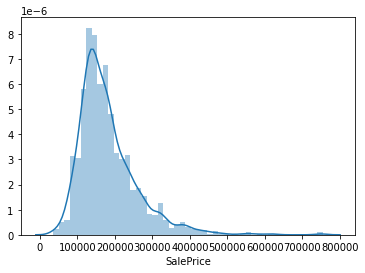

In [7]:
#histogram  直方图
sns.distplot(df_train['SalePrice']);

*'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:*

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*
* *<b>Show peakedness.</b>*

*This is getting interesting! 'SalePrice', could you give me your body measures?'*

In [8]:
#skewness and kurtosis 偏度 和 峰度
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

# Skewness: 1.882876 > 0 表明为正偏度 更多的数字在均值的左侧
# Kurtosis: 6.536282 > 0 具有正峰度值的分布表明，相比于正态分布，该分布有更重的尾部

Skewness: 1.882876
Kurtosis: 6.536282


### 偏度（skewness）
1. 偏度（skewness），数据的不对称程度。无论偏度值是 0、正数还是负数，都显示有关数据分布形状的信息 是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。偏度(Skewness)亦称偏态、偏态系数。
2. 正态：正态分布的偏度为0，两侧尾部长度对称。
3. 负偏态：若以bs表示偏度。bs<0称分布具有负偏离，也称左偏态，此时数据位于均值左边的比位于右边的少，直观表现为左边的尾部相对于与右边的尾部要长，因为有少数变量值很小，使曲线左侧尾部拖得很长；
4. 正偏态：bs>0称分布具有正偏离，也称右偏态，此时数据位于均值右边的比位于左边的少，直观表现为右边的尾部相对于与左边的尾部要长，因为有少数变量值很大，使曲线右侧尾部拖得很长；而bs接近0则可认为分布是对称的。若知道分布有可能在偏度上偏离正态分布时，可用偏离来检验分布的正态性。右偏时一般算术平均数>中位数>众数，左偏时相反，即众数>中位数>平均数。正态分布三者相等。

### 峰度
峰度表示分布的尾部与正态分布的区别。使用峰度可帮助您初步了解有关数据分布的一般特征
1. 基线：峰度值 0 完全服从正态分布的数据的峰度值为 0。正态分布的数据为峰度建立了基准。如果样本的峰度值显著偏离 0，则表明数据不服从正态分布。
2. 正峰度: 具有正峰度值的分布表明，相比于正态分布，该分布有更重的尾部。例如，服从 t 分布的数据具有正峰度值。实线表示正态分布，虚线表示具有正峰度值的分布。
3. 负峰度: 具有负峰度值的分布表明，相比于正态分布，该分布有更轻的尾部。例如，服从 Beta 分布（第一个和第二个分布形状参数等于 2）的数据具有负峰度值。实线表示正态分布，虚线表示具有负峰度值的分布。



For more information，please check [Here](https://support.minitab.com/zh-cn/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/data-concepts/how-skewness-and-kurtosis-affect-your-distribution/)

*'Amazing! If my love calculator is correct, our success probability is 97.834657%. I think we should meet again! Please, keep my number and give me a call if you're free next Friday. See you in a while, crocodile!'*

# 'SalePrice', her buddies and her interests

*It is military wisdom to choose the terrain where you will fight. As soon as 'SalePrice' walked away, we went to Facebook. Yes, now this is getting serious. Notice that this is not stalking. It's just an intense research of an individual, if you know what I mean.*

*According to her profile, we have some common friends. Besides Chuck Norris, we both know 'GrLivArea' and 'TotalBsmtSF'. Moreover, we also have common interests such as 'OverallQual' and 'YearBuilt'. This looks promising!*

*To take the most out of our research, we will start by looking carefully at the profiles of our common friends and later we will focus on our common interests.*

### Relationship with numerical variables  销售价格 与  GrLivArea，TotalBsmtSF 之间关系

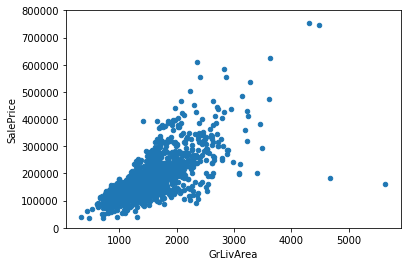

In [7]:
#scatter plot grlivarea/saleprice  销售价格的散点图
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# 画散点图
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*Hmmm... It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a <b>linear relationship.</b>*

*And what about 'TotalBsmtSF'?*

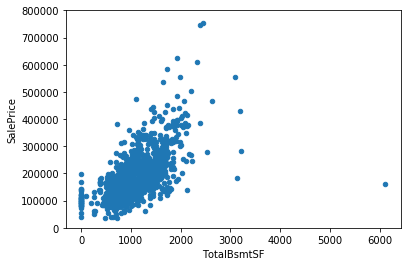

In [8]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

*'TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a <b>strong linear (exponential?)</b> reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.*

### Relationship with categorical features

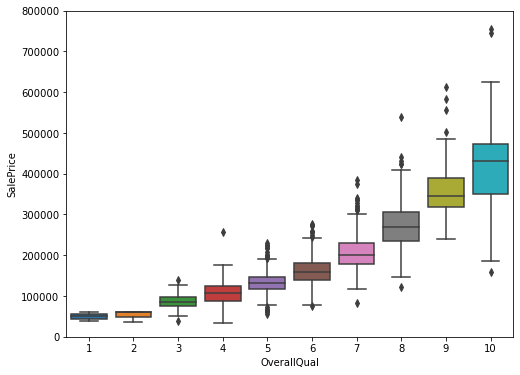

In [16]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

*Like all the pretty girls, 'SalePrice' enjoys 'OverallQual'. Note to self: consider whether McDonald's is suitable for the first date.*

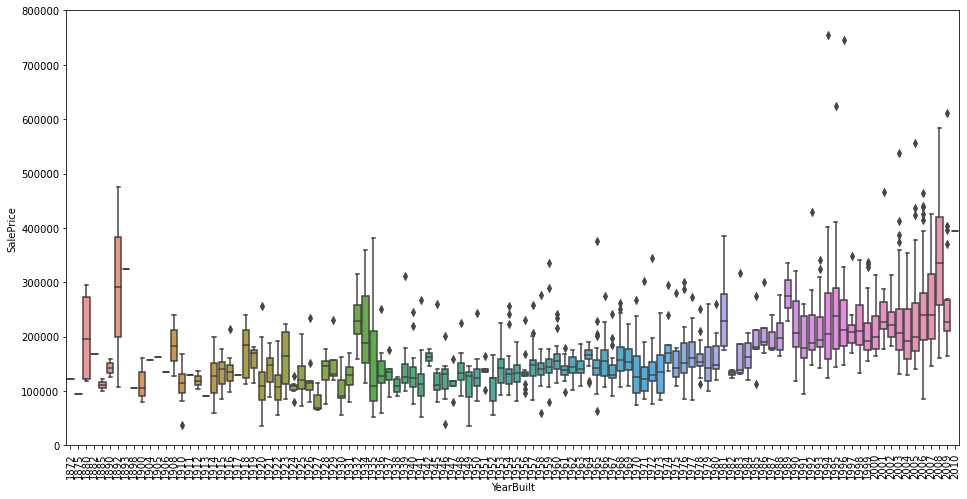

In [17]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

*Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.*

<b>Note</b>: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.

### In summary

Stories aside, we can conclude that:

* 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high. 三者呈现正相关性
* 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
“ OverallQual”和“ YearBuilt”似乎也与“ SalePrice”相关。 在“ OverallQual”的情况下，这种关系似乎更加牢固，其中的方框图显示了销售价格如何随着整体质量而增加。

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).
我们只是分析了四个变量，但是还有许多其他的我们需要分析。 这里的技巧似乎是正确特征的选择（特征选择），而不是它们之间复杂关系的定义（特征工程）
That said, let's separate the wheat from the chaff.

# 3. Keep calm and work smart

Until now we just followed our intuition and analysed the variables we thought were important. In spite of our efforts to give an objective character to our analysis, we must say that our starting point was subjective. 

As an engineer, I don't feel comfortable with this approach. All my education was about developing a disciplined mind, able to withstand the winds of subjectivity. There's a reason for that. Try to be subjective in structural engineering and you will see physics making things fall down. It can hurt.

So, let's overcome inertia and do a more objective analysis.

以上都是主观性的选择变量，查看他们之间存在的关系，进行相应的可视化。
但是要做更多的客观性分析。

### Correlation Analyst

To explore more objective analysis:
* Correlation matrix (heatmap style). 相关性矩阵，热力图
* 'SalePrice' correlation matrix (zoomed heatmap style).
* Scatter plots between the most correlated variables (move like Jagger style).

#### Correlation matrix (heatmap style)

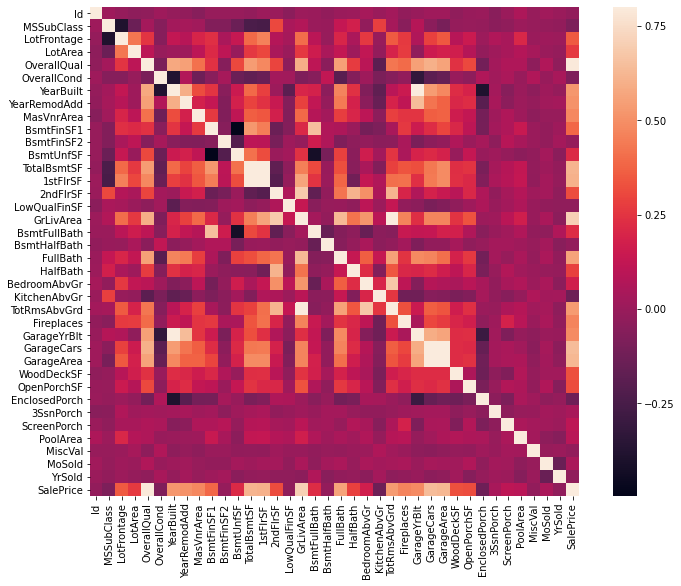

In [6]:
#correlation matrix
# 计算相关性矩阵， 使用  corr() 函数
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))  # 作用是控制画出来图形的大小
sns.heatmap(corrmat, vmax=.8, square=True);

# 包含了所有的变量，可以看出变量之间的相关性

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'Garage*X*' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

#### 'SalePrice' correlation matrix (zoomed heatmap style)

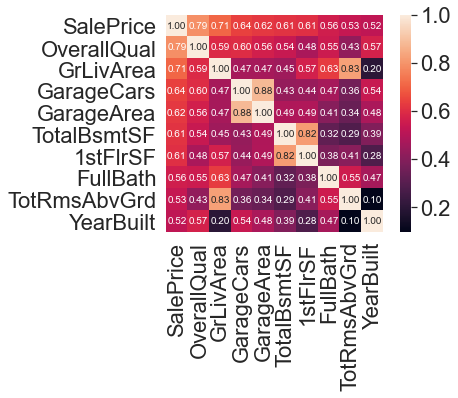

In [10]:
#saleprice correlation matrix  

k = 10   #number of variables for heatmap  选择10个变量
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=2) # 定义字体大小
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
* 'FullBath'?? Really? 
* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
* YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.
Let's proceed to the scatter plots. 接续看散点图

#### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)

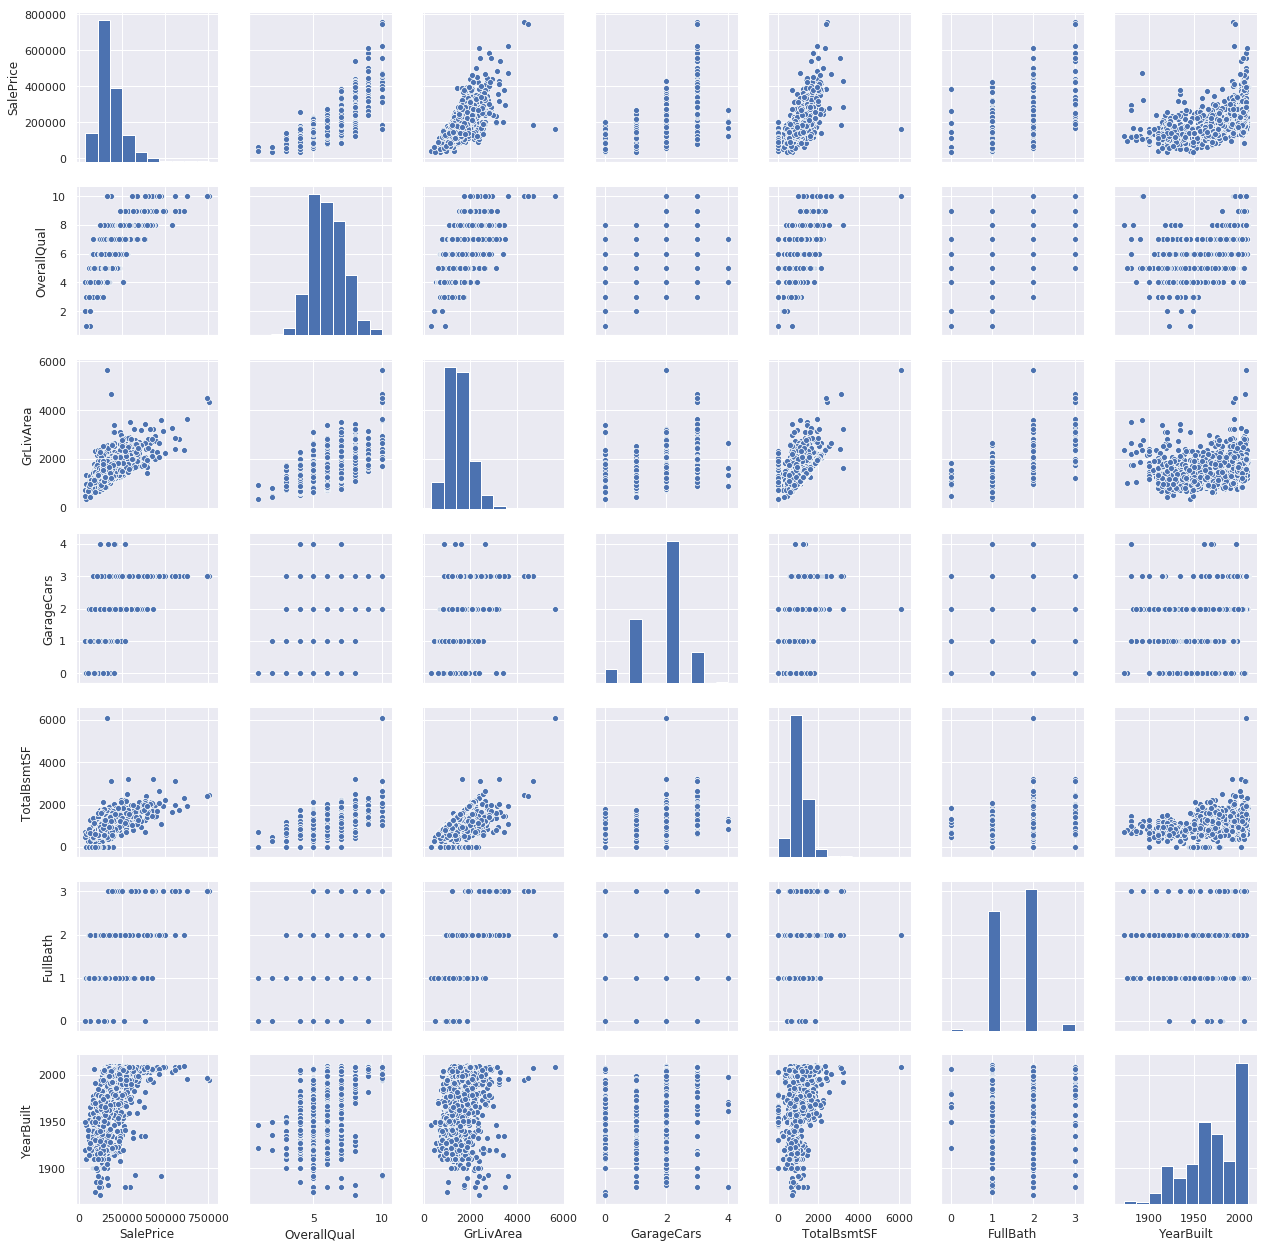

In [13]:
#scatterplot 选择7个column 看他们之间
# 为联合关系绘制散点图，为单变量绘制直方图
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea about variables relationships.

One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

Ok, enough of Rorschach test for now. Let's move forward to what's missing: missing data!

# 4. Missing data
处理缺失值
Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

出于实际原因，这些问题的答案很重要，因为缺少数据可能意味着样本量减少。 这可能会阻止我们继续进行分析。 而且，从实质的角度来看，我们需要确保丢失的数据过程不存在偏见并掩盖不便的事实。

In [11]:
#missing data
# 计算缺失值的总和
total = df_train.isnull().sum().sort_values(ascending=False)
#计算百分比
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

#生产一个新的表格
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#打印前20行数据
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.


我们将考虑到，当丢失超过15％的数据时，我们应该删除相应的变量并假装它不存在。 这意味着在这种情况下，我们不会尝试任何技巧来填充丢失的数据。 据此，我们应删除一组变量（例如“ PoolQC”，“ MiscFeature”，“ Alley”等）。 关键是：我们会错过这些数据吗？ 我不这么认为。 这些变量似乎都不是很重要，因为大多数都不是我们在购买房屋时要考虑的方面（也许这就是数据丢失的原因？）。 此外，仔细观察变量，我们可以说'PoolQC'，'MiscFeature'和'FireplaceQu'之类的变量是异常值的强力候选者，因此我们很乐意将其删除。

In what concerns the remaining cases, we can see that 'Garage*X*' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20$ in 5$ problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'Garage*X*' variables. The same logic applies to 'Bsmt*X*' variables.

关于其余情况，我们可以看到“ Garage * X *”变量具有相同数量的丢失数据。 我敢打赌，缺失的数据指的是同一组观测值（尽管我不会对其进行检查；它只是5％，我们不应在5美元的问题上花费20美元）。 由于有关车库的最重要信息是由“ GarageCars”表示的，并且考虑到我们只是在谈论丢失的数据的5％，因此我将删除提及的“ Garage * X *”变量。 相同的逻辑适用于“ Bsmt * X *”变量。

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

关于“ MasVnrArea”和“ MasVnrType”，我们可以认为这些变量不是必需的。 此外，它们与已经考虑的“ YearBuilt”和“ OverallQual”有很强的相关性。 因此，如果删除“ MasVnrArea”和“ MasVnrType”，我们将不会丢失信息。

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

最后，我们在“电气”中有一个缺失的观察。 由于这只是一个观察值，因此我们将删除该观察值并保留变量。

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

总之，要处理丢失的数据，我们将删除所有带有丢失数据的变量，但变量“ Electrical”除外。 在“电子”中，我们将删除缺少数据的观测值。

In [13]:
#dealing with missing data  处理缺失值
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# Out liars!

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

### Univariate analysis  单变量分析

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

这里主要关注的是建立一个将观察值定义为异常值的阈值。 为此，我们将对数据进行标准化。 在这种情况下，数据标准化意味着将数据值转换为均值为0且标准差为1。

In [15]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83714031]
 [-1.83197013]
 [-1.79940175]
 [-1.78179041]
 [-1.77298475]
 [-1.62203048]
 [-1.61574072]
 [-1.58429192]
 [-1.58429192]
 [-1.57180045]]

outer range (high) of the distribution:
[[3.82490259]
 [4.036704  ]
 [4.49161726]
 [4.70546914]
 [4.72535736]
 [5.05685293]
 [5.41818712]
 [5.58603569]
 [7.09557834]
 [7.22137356]]


How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

### Bivariate analysis  二元分析

We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


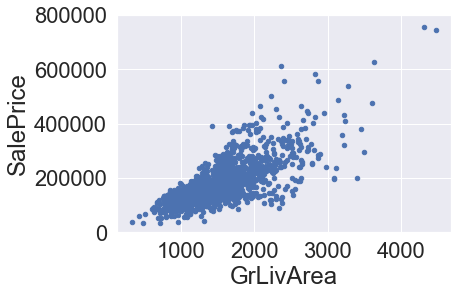

In [16]:
#bivariate analysis saleprice/grlivarea  二元分析销售价格
# 目标列
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

What has been revealed:

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

带有更大“ GrLivArea”的两个值似乎很奇怪，并且它们并未跟随人群。 我们可以推测为什么会这样。 也许他们指的是农业领域，这可以解释价格低廉的原因。 我对此不确定，但我很有信心，这两点不能代表典型案例。 因此，我们将它们定义为离群值并将其删除。

* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

图顶部的两个观测值是我们应注意的7.some观测值。 它们看起来像两种特殊情况，但是它们似乎在追随潮流。 因此，我们将保留它们。

In [12]:
#deleting points 删除点
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

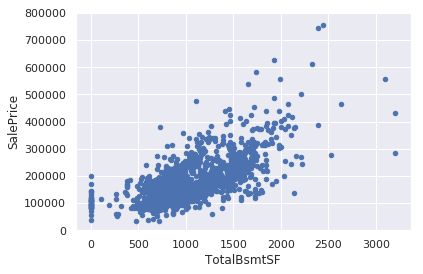

In [19]:
#bivariate analysis saleprice/grlivarea  二元分析销售价格
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

# 5. Getting hard core


The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques. 这个应该可以和  5855  多元统计分析联系起来 

According to [Hair et al. (2013)](https://amzn.to/2uC3j9p), four assumptions should be tested:

* <b>Normality</b> 常态性 - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely  on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* <b>Homoscedasticity</b> 同方差性 - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' [(Hair et al., 2013)](https://amzn.to/2uC3j9p). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* <b>Linearity</b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* <b>Absence of correlated errors</b> 无相关误差- Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.



### In the search for normality

The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

* <b>Histogram</b> - Kurtosis and skewness.  直方图- 峰度和偏度
* <b>Normal probability plot</b> - Data distribution should closely follow the diagonal that represents the normal distribution. 数据分布应紧跟代表正态分布的对角线。

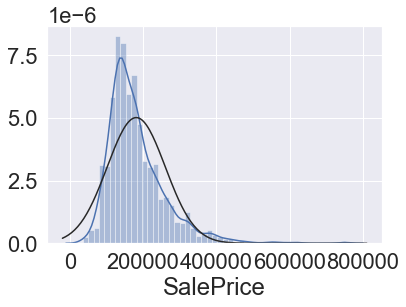

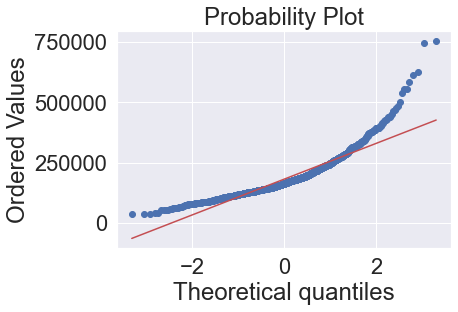

In [17]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.
不满足正态分布，也不遵守对角线分布

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this.



In [18]:
#applying log transformation  做对数转换
df_train['SalePrice'] = np.log(df_train['SalePrice'])

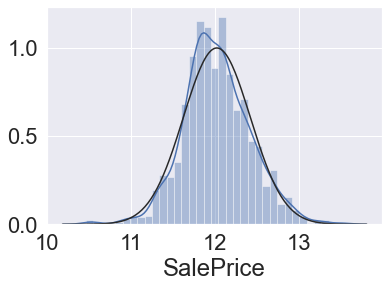

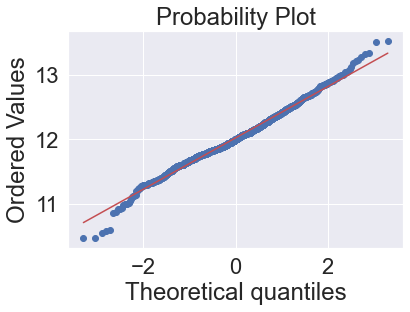

In [19]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Same process will go on with 'GrLivArea'.

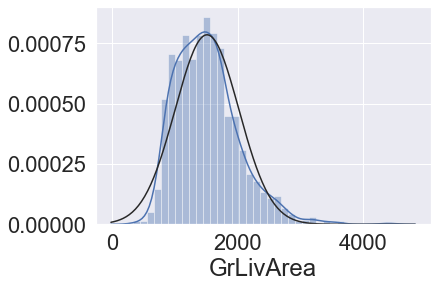

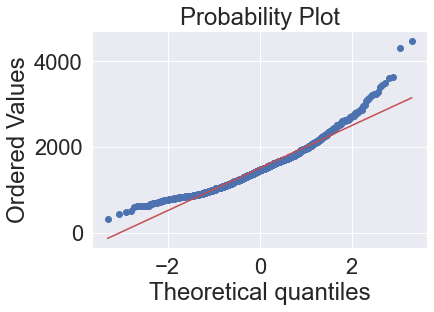

In [20]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [22]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

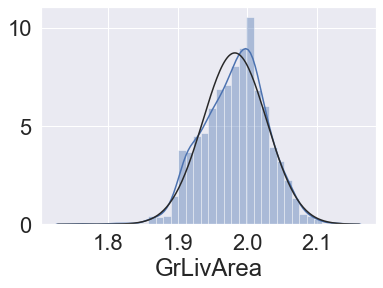

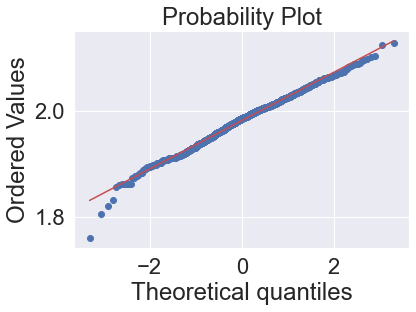

In [23]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Next, please...

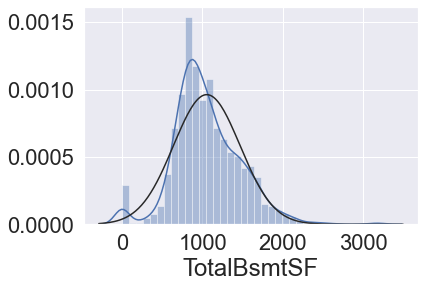

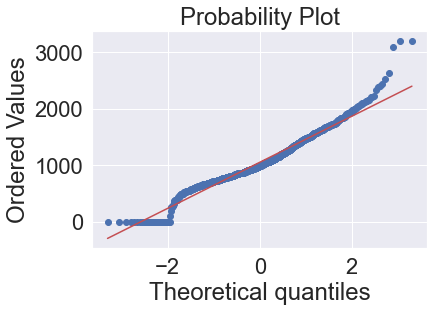

In [24]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

Ok, now we are dealing with the big boss. What do we have here?

* Something that, in general, presents skewness.
* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations. 一个大问题是因为值零不允许我们进行对数转换。

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

In [25]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [26]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

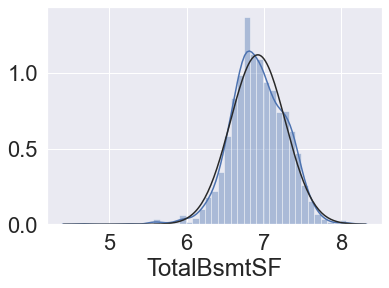

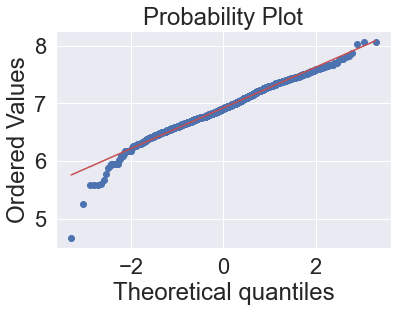

In [27]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### In the search for writing 'homoscedasticity' right at the first attempt

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

测试两个度量变量的均方差的最佳方法是图形化。 通过圆锥（在图形的一侧较小的色散，在相反侧的较大色散）或菱形（分布的中心处有大量点）来表示偏离均等色散的形状。

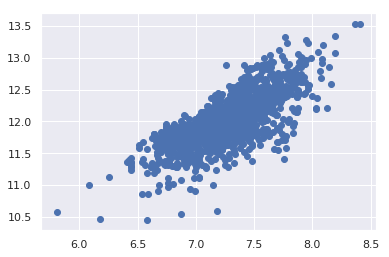

In [30]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

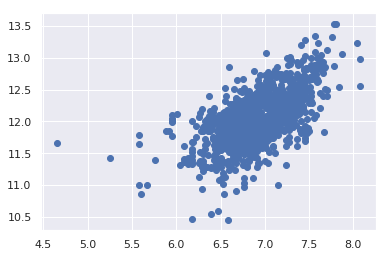

In [31]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. 
可以说，通常，“ SalePrice”在“ TotalBsmtSF”的整个范围内均表现出相同的方差水平。

# Last but not the least, dummy variables

Easy mode.

In [32]:
#convert categorical variable into dummy  将分类变量转换为虚拟变量
df_train = pd.get_dummies(df_train)

# Conclusion

That's it! We reached the end of our exercise.

Throughout this kernel we put in practice many of the strategies proposed by [Hair et al. (2013)](https://amzn.to/2uC3j9p). We philosophied about the variables, we analysed 'SalePrice' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.

在整个内核中，我们将Hair等人提出的许多策略付诸实践。 （2013）。 我们对变量进行了哲学思考，仅对“ SalePrice”进行了分析，并使用了相关性最高的变量，处理了缺失的数据和异常值，测试了一些基本的统计假设，甚至将分类变量转换为虚拟变量。 Python帮助我们简化了很多工作。

Now it's time to give a call to 'SalePrice' and invite her to dinner. Try to predict her behaviour. Do you think she's a girl that enjoys regularized linear regression approaches? Or do you think she prefers ensemble methods? Or maybe something else?

现在是时候打电话给“ SalePrice”并邀请她共进晚餐。 尝试预测她的行为。 您认为她是一个喜欢正规线性回归方法的女孩吗？ 还是您认为她更喜欢集成方法？ 也许还有其他东西？
